In [1]:
import ibm_db
import itc_utils.flight_service as itcfs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import itc_utils.flight_service as itcfs

In [39]:
#  Adjust the display message as needed by editing the following lines:
from IPython.display import display, HTML
display(HTML("A row limit of 50000 has been applied to the query to enable sample previewing. If the data set is larger, only the first 5000 rows will be loaded."))

In [40]:
readClient = itcfs.get_flight_client()

# NOTE:
#  A limit of 50000 rows has been applied to the request to enable sample previewing.
#  Adjust the display message as needed by editing the following lines:
from IPython.display import display, HTML
display(HTML("A row limit of 50000 has been applied to the query to enable sample previewing. If the data set is larger, only the first 5000 rows will be loaded."))
#  Edit select_statement to change or disable the row limit.
#
#  Read INBOUND_MESSAGE table
#
DB2Connection_4_DataStage_data_request = {
    'connection_name': """DB2Connection_4_DataStage""",
    'interaction_properties': {
        'select_statement': 'SELECT  "SOURCE_SYSTEM_NM", "RECORD_TYP", "PIPELINE_NM", \
                                    "PROCESS_ID", "PROCESS_RUN_ID", "SOURCE_TOTAL_CNT", "SOURCE_UPSERT_CNT", "SOURCE_DELETE_CNT", \
                                    "REJECT_CNT", timestamp("PIPELINE_START_DATETIME",0) as START_TIME, timestamp("PIPELINE_END_DATETIME",0) as END_TIME, "PIPELINE_TOTAL_EXECUTION_TIME" as EXECUTION_TIME, \
                                     "PIPELINE_STAT_CD" \
                                FROM "CP4D_CMDM_BATCH_CTL"."CMDM_INBOUND_PROCESS" '
#                                FETCH FIRST 50000 ROWS ONLY'
    }
}
flightInfo = itcfs.get_flight_info(readClient, nb_data_request=DB2Connection_4_DataStage_data_request)

inbound_df = itcfs.read_pandas_and_concat(readClient, flightInfo, timeout=240)
inbound_df.head(100)


SOURCE_SYSTEM_NM                    RECORD_TYP  \
0      DUMMY SOURCE             DUMMY RECORD TYPE   
1           EPSILON                        PERSON   
2           EPSILON                PERSON_ACCOUNT   
3           EPSILON  PERSON_COMMUNICATION_CONSENT   
4        SALESFORCE                        PERSON   
..              ...                           ...   
62            GIGYA            PERSON_INTERACTION   
63            GIGYA                        PERSON   
64            GIGYA                PERSON_ACCOUNT   
65            GIGYA  PERSON_COMMUNICATION_CONSENT   
66            GIGYA            PERSON_INTERACTION   

                       PIPELINE_NM  \
0              DUMMY PIPELINE NAME   
1                  First Time Run    
2                   First Time Run   
3                   First Time Run   
4                   First Time Run   
..                             ...   
62  plInbound_BatchControl_Process   
63  plInbound_BatchControl_Process   
64  plInbound_BatchControl_Process   
65  plInbound_BatchControl_Process   
66  plInbound_BatchControl_Process   

                                       PROCESS_ID  \
0                                       000000000   
1                                       000000000   
2                                       000000000   
3                                       000000000   
4                                       000000000   
..                                            ...   
62  37973853-b88b-4bca-9b76-fffc2f0c0dd0-396ef198   
63  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
64  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
65  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
66  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   

                          PROCESS_RUN_ID  SOURCE_TOTAL_CNT  SOURCE_UPSERT_CNT  \
0   00000000-0000-0000-0000-000000000000                 0                  0   
1   00000000-0000-0000-0000-000000000000                 0                  0   
2   00000000-0000-0000-0000-000000000000                 0                  0   
3   00000000-0000-0000-0000-000000000000                 0                  0   
4   00000000-0000-0000-0000-000000000000                 0                  0   
..                                   ...               ...                ...   
62  393a1809-6b02-4e83-a844-70333907017d             51298              51298   
63  58b67c21-8a32-45ea-9e18-f08da709f0ac            365173             365173   
64  80a54332-9a97-45cf-867c-0f69eeb68923            353922             353922   
65  b287c92d-3968-4fbd-8748-12c7bf740aec            244812             244812   
66  6764cb46-29fd-42d9-8e34-4f0f7228e053            153744             153744   

    SOURCE_DELETE_CNT  REJECT_CNT          START_TIME            END_TIME  \
0                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
1                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
2                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
3                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
4                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
..                ...         ...                 ...                 ...   
62                  0           0 2023-10-06 16:24:47 2023-10-06 17:03:18   
63                  0           0 2023-10-06 19:52:01 2023-10-06 21:50:55   
64                  0           0 2023-10-06 19:52:05 2023-10-06 21:44:13   
65                  0           0 2023-10-06 19:52:12 2023-10-06 21:18:51   
66                  0           0 2023-10-06 19:52:16 2023-10-06 20:53:59   

   EXECUTION_TIME PIPELINE_STAT_CD  
0               0                F  
1               0                C  
2               0                C  
3               0                C  
4               0                C  
..            ...              ...  
62           2311                C  
63           7134                C  
64           6728                C  
65  

In [41]:
#
#
#  Read OUTBOUND_MESSAGE table
#
DB2Connection_4_DataStage_data_request = {
    'connection_name': """DB2Connection_4_DataStage""",
    'interaction_properties': {
        'select_statement': 'SELECT "RECORD_TYP", "TOPIC_NM", timestamp("CREATE_TS",0) as CREATE_DATE, \
                                    "TOTAL_ENTITY_CNT", "TOTAL_ENTITY_ADDED", "TOTAL_ENTITY_DELETED", "TOTAL_ENTITY_UPDATED", \
                                    "TOTAL_RECORD_CNT", "TOTAL_RECORD_ADDED", "TOTAL_RECORD_DELETED", "TOTAL_RECORD_UPDATED"  \
                                FROM "CP4D_CMDM_OUT_CTL"."CMDM_OUTBOUND_MESSAGE" \
                                WHERE "TOTAL_RECORD_CNT" > 0' or "TOTAL_ENTITY_CNT" > 0
 #                               FETCH FIRST 50000 ROWS ONLY'
    }
}
flightInfo = itcfs.get_flight_info(readClient, nb_data_request=DB2Connection_4_DataStage_data_request)



outbound_df = itcfs.read_pandas_and_concat(readClient, flightInfo, timeout=240)
outbound_df.head(100)

RECORD_TYP                         TOPIC_NM         CREATE_DATE  \
0   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:15:43   
1   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:15:53   
2   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:15:56   
3   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:15:57   
4   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:15:57   
..            ...                              ...                 ...   
95  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:33:45   
96  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:34:22   
97  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:36:15   
98  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:36:16   
99  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 23:36:20   

    TOTAL_ENTITY_CNT  TOTAL_ENTITY_ADDED  TOTAL_ENTITY_DELETED  \
0                 82                  65                     3   
1                 83                  71                     3   
2                 83                  67                     3   
3                 85                  65                     4   
4                 84                  72                     2   
..               ...                 ...                   ...   
95                57                  44                     2   
96                50                  40                     3   
97                61                  46                     0   
98                69                  58                     3   
99                56                  50                     1   

    TOTAL_ENTITY_UPDATED  TOTAL_RECORD_CNT  TOTAL_RECORD_ADDED  \
0                     14                91                  65   
1                      9                97                  71   
2                     13                85                  67   
3                     16                93                  65   
4                     10                88                  72   
..                   ...               ...                 ...   
95                    11                58                  44   
96                     7                56                  41   
97                    15                63                  46   
98                     8                76                  58   
99                     5                58                  50   

    TOTAL_RECORD_DELETED  TOTAL_RECORD_UPDATED  
0                      0                    26  
1                      0                    26  
2                      0                    18  
3                      0                    28  
4                      0                    16  
..                   ...                   ...  
95                     0                    14  
96                     0                    15  
97                     0                    17  
98                     0                    18  
99                     0                     8  

[100 rows x 11 columns]

In [42]:
# Sort both data sets to get a better view

In [45]:
inbound_df_s = inbound_df.sort_values(['START_TIME','SOURCE_SYSTEM_NM', 'RECORD_TYP' ], ascending=[False, True, True])

inbound_df_s

SOURCE_SYSTEM_NM                    RECORD_TYP  \
66            GIGYA            PERSON_INTERACTION   
65            GIGYA  PERSON_COMMUNICATION_CONSENT   
64            GIGYA                PERSON_ACCOUNT   
63            GIGYA                        PERSON   
62            GIGYA            PERSON_INTERACTION   
..              ...                           ...   
9       HYBRIS-EAST            PERSON_INTERACTION   
10      HYBRIS-WEST                        PERSON   
11      HYBRIS-WEST                PERSON_ACCOUNT   
4        SALESFORCE                        PERSON   
5        SALESFORCE  PERSON_COMMUNICATION_CONSENT   

                       PIPELINE_NM  \
66  plInbound_BatchControl_Process   
65  plInbound_BatchControl_Process   
64  plInbound_BatchControl_Process   
63  plInbound_BatchControl_Process   
62  plInbound_BatchControl_Process   
..                             ...   
9                   First Time Run   
10                  First Time Run   
11                  First Time Run   
4                   First Time Run   
5                   First Time Run   

                                       PROCESS_ID  \
66  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
65  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
64  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
63  8cdc9d82-a358-4f50-8093-941b54c42f12-ea516a21   
62  37973853-b88b-4bca-9b76-fffc2f0c0dd0-396ef198   
..                                            ...   
9                                       000000000   
10                                      000000000   
11                                      000000000   
4                                       000000000   
5                                       000000000   

                          PROCESS_RUN_ID  SOURCE_TOTAL_CNT  SOURCE_UPSERT_CNT  \
66  6764cb46-29fd-42d9-8e34-4f0f7228e053            153744             153744   
65  b287c92d-3968-4fbd-8748-12c7bf740aec            244812             244812   
64  80a54332-9a97-45cf-867c-0f69eeb68923            353922             353922   
63  58b67c21-8a32-45ea-9e18-f08da709f0ac            365173             365173   
62  393a1809-6b02-4e83-a844-70333907017d             51298              51298   
..                                   ...               ...                ...   
9   00000000-0000-0000-0000-000000000000                 0                  0   
10  00000000-0000-0000-0000-000000000000                 0                  0   
11  00000000-0000-0000-0000-000000000000                 0                  0   
4   00000000-0000-0000-0000-000000000000                 0                  0   
5   00000000-0000-0000-0000-000000000000                 0                  0   

    SOURCE_DELETE_CNT  REJECT_CNT          START_TIME            END_TIME  \
66                  0           0 2023-10-06 19:52:16 2023-10-06 20:53:59   
65                  0           0 2023-10-06 19:52:12 2023-10-06 21:18:51   
64                  0           0 2023-10-06 19:52:05 2023-10-06 21:44:13   
63                  0           0 2023-10-06 19:52:01 2023-10-06 21:50:55   
62                  0           0 2023-10-06 16:24:47 2023-10-06 17:03:18   
..                ...         ...                 ...                 ...   
9                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
10                  0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
11                  0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
4                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   
5                   0           0 2023-09-27 16:35:02 2023-09-27 16:35:02   

   EXECUTION_TIME PIPELINE_STAT_CD  
66           3703                C  
65           5199                C  
64           6728                C  
63           7134                C  
62           2311                C  
..            ...              ...  
9               0                C  
10              0                C  
11              0                C  
4   

In [46]:
outbound_df_s = outbound_df.sort_values(['CREATE_DATE','RECORD_TYP', 'TOPIC_NM'], ascending=[False, True, True])

outbound_df_s

RECORD_TYP                         TOPIC_NM         CREATE_DATE  \
20653  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-10-06 22:42:32   
20654  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-10-06 22:42:32   
20655  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-10-06 22:42:32   
20656  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-10-06 22:42:32   
20657  PERSON_ENTITY  cmdm.incremental.person.entity5 2023-10-06 22:42:32   
...              ...                              ...                 ...   
4165   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 22:10:10   
4166   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 22:10:10   
4160   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 22:10:09   
4161   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 22:10:09   
4162   PERSON_ENTITY  cmdm.incremental.person.entity5 2023-09-26 22:10:09   

       TOTAL_ENTITY_CNT  TOTAL_ENTITY_ADDED  TOTAL_ENTITY_DELETED  \
20653               613                  70                    21   
20654               552                  49                     7   
20655               599                  62                    14   
20656               545                  52                    12   
20657               548                  52                    12   
...                 ...                 ...                   ...   
4165                  1                   1                     0   
4166                  1                   0                     0   
4160                  1                   0                     0   
4161                  1                   0                     0   
4162                  1                   1                     0   

       TOTAL_ENTITY_UPDATED  TOTAL_RECORD_CNT  TOTAL_RECORD_ADDED  \
20653                   522               622                  70   
20654                   496               546                  49   
20655                   523               605                  62   
20656                   481               542                  52   
20657                   484               562                  52   
...                     ...               ...                 ...   
4165                      0                 1                   1   
4166                      1                 1                   0   
4160                      1                 1                   0   
4161                      1                 1                   0   
4162                      0                 1                   1   

       TOTAL_RECORD_DELETED  TOTAL_RECORD_UPDATED  
20653                     0                   552  
20654                     0                   497  
20655                     0                   543  
20656                     0                   490  
20657                     0                   510  
...                     ...                   ...  
4165                      0                     0  
4166                      0                     1  
4160                      0                     1  
4161                      0                     1  
4162                      0                     0  

[20677 rows x 11 columns]

### This user defined function will simplify the analysis of the dataframes as it consolodates various commands

In [65]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [66]:
resumetable(outbound_df)

Dataset Shape: (20677, 11)


Name          dtypes  Missing  Uniques
0             RECORD_TYP          object        0        4
1               TOPIC_NM          object        0       20
2            CREATE_DATE  datetime64[ns]        0    14237
3       TOTAL_ENTITY_CNT           int64        0      660
4     TOTAL_ENTITY_ADDED           int64        0      170
5   TOTAL_ENTITY_DELETED           int64        0       31
6   TOTAL_ENTITY_UPDATED           int64        0      636
7       TOTAL_RECORD_CNT           int64        0     1662
8     TOTAL_RECORD_ADDED           int64        0      891
9   TOTAL_RECORD_DELETED           int64        0        1
10  TOTAL_RECORD_UPDATED           int64        0     1623

In [67]:
resumetable(inbound_df)

Dataset Shape: (67, 13)


Name          dtypes  Missing  Uniques
0    SOURCE_SYSTEM_NM          object        0        6
1          RECORD_TYP          object        0        5
2         PIPELINE_NM          object        0        4
3          PROCESS_ID          object        0       17
4      PROCESS_RUN_ID          object        0       52
5    SOURCE_TOTAL_CNT           int64        0       39
6   SOURCE_UPSERT_CNT           int64        0       39
7   SOURCE_DELETE_CNT           int64        0        1
8          REJECT_CNT           int64        0        1
9          START_TIME  datetime64[ns]        0       51
10           END_TIME  datetime64[ns]        0       52
11     EXECUTION_TIME          object        0       51
12   PIPELINE_STAT_CD          object        0        2

In [47]:
inbound_df.describe()

SOURCE_TOTAL_CNT  SOURCE_UPSERT_CNT  SOURCE_DELETE_CNT  REJECT_CNT
count         67.000000          67.000000               67.0        67.0
mean       87598.880597       87598.880597                0.0         0.0
std        89869.260582       89869.260582                0.0         0.0
min            0.000000           0.000000                0.0         0.0
25%           58.000000          58.000000                0.0         0.0
50%        69465.000000       69465.000000                0.0         0.0
75%       132341.000000      132341.000000                0.0         0.0
max       365173.000000      365173.000000                0.0         0.0

In [48]:
outbound_df.describe()

TOTAL_ENTITY_CNT  TOTAL_ENTITY_ADDED  TOTAL_ENTITY_DELETED  \
count      20677.000000        20677.000000          20677.000000   
mean         136.939885           38.071819              3.783624   
std          139.166858           37.691857              3.768576   
min            0.000000            0.000000              0.000000   
25%           82.000000            0.000000              0.000000   
50%          133.000000           36.000000              3.000000   
75%          163.000000           57.000000              6.000000   
max         1130.000000          174.000000             30.000000   

       TOTAL_ENTITY_UPDATED  TOTAL_RECORD_CNT  TOTAL_RECORD_ADDED  \
count          20677.000000      20677.000000        20677.000000   
mean              95.084442        344.756880          105.231707   
std              138.829568        726.540152          404.095927   
min                0.000000          1.000000            0.000000   
25%               17.000000        108.000000           12.000000   
50%               68.000000        152.000000           44.000000   
75%              104.000000        209.000000           66.000000   
max             1130.000000       8204.000000         7026.000000   

       TOTAL_RECORD_DELETED  TOTAL_RECORD_UPDATED  
count               20677.0          20677.000000  
mean                    0.0            239.525173  
std                     0.0            526.827032  
min                     0.0              0.000000  
25%                     0.0             59.000000  
50%                     0.0             93.000000  
75%                     0.0            175.000000  
max                     0.0           5535.000000

In [ ]:

groce_25 = outbound_df.groupby('Item_Desc')['Customer_ID'].count().nlargest(25)

# Lets print it in pretty way
print(groce_25.to_markdown())

In [50]:
# Get range of data for meassurements in the table
#
outbound_df["CREATE_DATE"].min(), outbound_df["CREATE_DATE"].max()

(Timestamp('2023-09-26 22:10:09'), Timestamp('2023-10-06 22:42:32'))

In [69]:
 outbound_df_g = outbound_df.groupby("RECORD_TYP")["TOPIC_NM"].count()  

In [71]:
outbound_df_g               #number of rows in each group

RECORD_TYP
PERSON_ACCOUNT                    961
PERSON_COMMUNICATION_CONSENT      898
PERSON_ENTITY                   17963
PERSON_INTERACTION                855
Name: TOPIC_NM, dtype: int64

In [54]:
outbound_df_g['TOTAL_ENTITY_CNT','TOTAL_RECORD_CNT'].sum()      #get the content of a group grouped['Points'].agg(np.mean)


/tmp/1000710000/ipykernel_121/552054305.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outbound_df_g['TOTAL_ENTITY_CNT','TOTAL_RECORD_CNT'].sum()      #get the content of a group grouped['Points'].agg(np.mean)


TOTAL_ENTITY_CNT  \
RECORD_TYP         TOPIC_NM                             CREATE_DATE                             
PERSON_ACCOUNT     cmdm.incremental.person.account1     2023-09-29 03:10:23                 0   
                                                        2023-09-29 03:15:23                 0   
                                                        2023-09-29 03:20:24                 0   
                                                        2023-09-29 03:25:24                 0   
                                                        2023-09-29 03:30:25                 0   
...                                                                                       ...   
PERSON_INTERACTION cmdm.incremental.person.interaction5 2023-10-06 21:14:42                 0   
                                                        2023-10-06 21:14:43                 0   
                                                        2023-10-06 21:14:48                 0   
                                                        2023-10-06 21:20:46                 0   
                                                        2023-10-06 21:21:46                 0   

                                                                             TOTAL_RECORD_CNT  
RECORD_TYP         TOPIC_NM                             CREATE_DATE                            
PERSON_ACCOUNT     cmdm.incremental.person.account1     2023-09-29 03:10:23               636  
                                                        2023-09-29 03:15:23             11447  
                                                        2023-09-29 03:20:24             12326  
                                                        2023-09-29 03:25:24             12600  
                                                        2023-09-29 03:30:25             12200  
...                                                                                       ...  
PERSON_INTERACTION cmdm.incremental.person.interaction5 2023-10-06 21:14:42              4158  
                                                        2023-10-06 21:14:43             20704  
                                                        2023-10-06 21:14:48              8201  
                                                        2023-10-06 21:20:46              6614  
                                                        2023-10-06 21:21:46               842  

[14328 rows x 2 columns]

/tmp/1000710000/ipykernel_121/3730728777.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outbound_df.groupby(outbound_df["CREATE_DATE"].dt.minute)["TOTAL_ENTITY_CNT","TOTAL_RECORD_CNT"].sum().plot( kind='bar', rot=0, ax=axs )


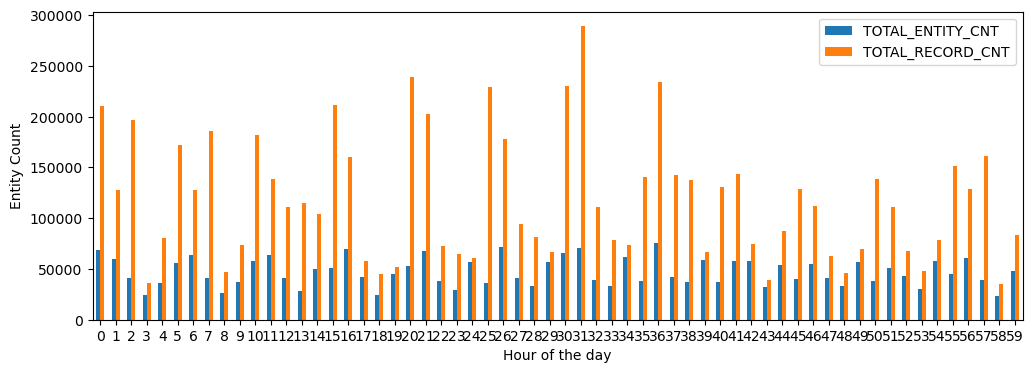

In [55]:
fig, axs = plt.subplots(figsize=(12, 4))

outbound_df.groupby(outbound_df["CREATE_DATE"].dt.minute)["TOTAL_ENTITY_CNT","TOTAL_RECORD_CNT"].sum().plot( kind='bar', rot=0, ax=axs )


plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("Entity Count");

In [59]:
plt.figure(figsize=(30, 8))

run_time = outbound_df['CREATE_TS']
entity_t = outbound_df['TOTAL_ENTITY_CNT']
record = outbound_df['TOTAL_RECORD_CNT']
plt.plot(run_time, entity_t, color ='orange', linewidth = 1, label ='Entity')

## plt.plot(run_time, record, color ='g', marker ='o', markersize = 4, label ='Person Record')
 
plt.xlabel('Run Time')
plt.ylabel('Counters')
 
plt.title('Counters during Run')
 
plt.legend()
plt.show()

KeyError: 'CREATE_TS'

<Figure size 3000x800 with 0 Axes>

In [17]:



data_df_2.Time = pd.to_datetime(data_df_2.Time).dt.time
data_df_2.set_index('Time').plot()

AttributeError: 'DataFrame' object has no attribute 'Time'